Q-4. Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Nirbhay\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Nirbhay\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Nirbhay\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv(r"C:\Users\Nirbhay\Downloads\online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.duplicated().sum()

125

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

Transforming the column type for better analysis

In [8]:
df["Month"].value_counts()

Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

In [9]:
month_mapping = {"Jan": 1,"Feb": 2,"Mar": 3,"Apr": 4,"May": 5,"June": 6,"Jul": 7,"Aug": 8,"Sep": 9,"Oct": 10,"Nov": 11,"Dec": 12}

df["Month"] = df["Month"].replace(month_mapping)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [11]:
df["VisitorType"].value_counts()

VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64

In [12]:
count = len(df[(df['VisitorType'] == 'Other') & (df['Revenue'] == True)])
print(count)

16


In [13]:
count = len(df[(df['Revenue'] == True)])
count

1908

The VisitorType when Other has very less information and they consist of very less numbers.

Hence dropping the rows when visitor type are other

In [14]:
df = df.drop(df[df['VisitorType'] == 'Other'].index)

In [15]:
#doing one hot encoding
visitor_encoded = pd.get_dummies(df['VisitorType'], prefix='VisitorType', drop_first = True)
df = pd.concat([df, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [16]:
#convertingn boolean dtype to int
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

<AxesSubplot: >

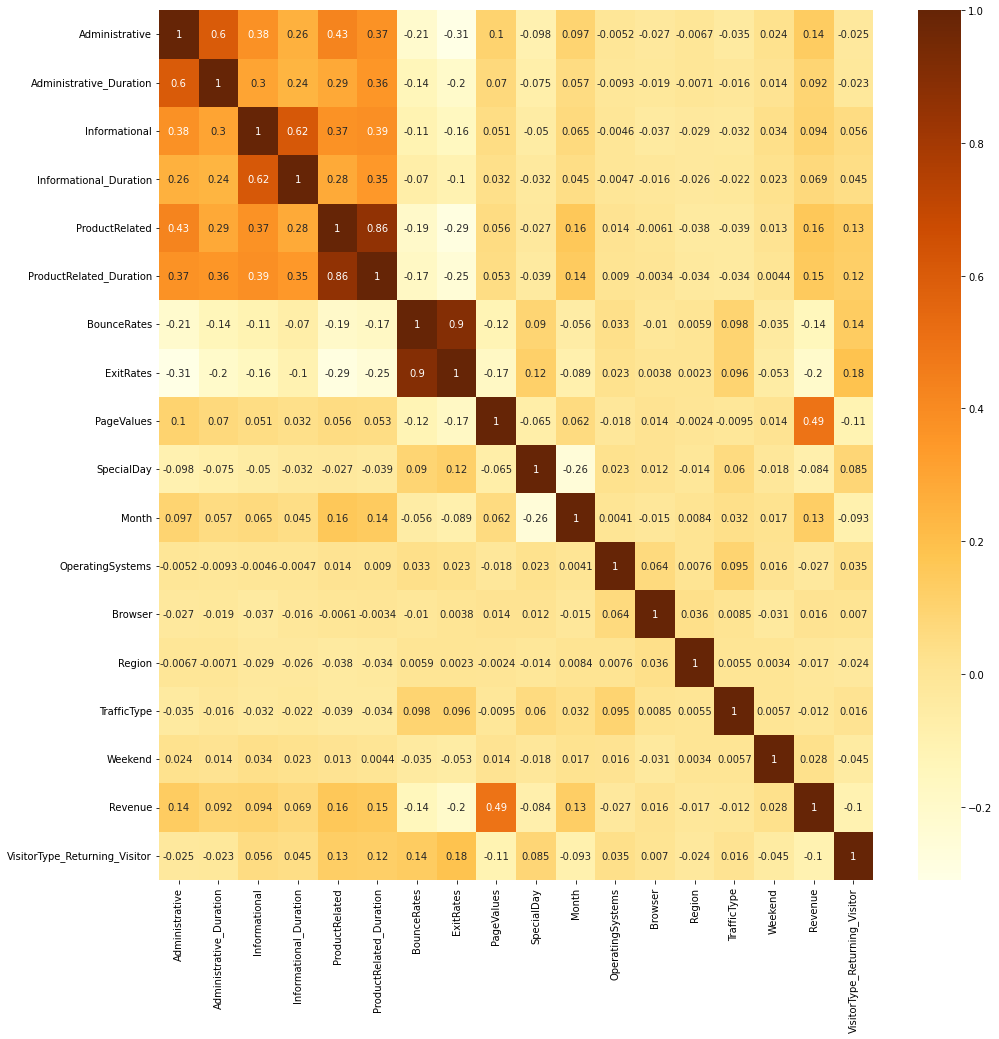

In [17]:
df_Corr = df.corr()
fig, ax = plt.subplots(figsize=(16,16))  
sns.heatmap(df_Corr, xticklabels=df_Corr.columns, yticklabels=df_Corr.columns, annot=True, cmap = 'YlOrBr')

Based on the heatmap visualization, I have decided to remove independent variables with a correlation coefficient of 0.05 or lower with the dependent variable (based on absolute values).

Therefore, I will remove the following columns: Month, Browser, OperatingSystems, Region, TrafficType, Weekend.

Also Exitrate and Bounce rate has correlation of 0.9 so dropping either one of them.

In [18]:
df1 = df.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend','ExitRates'], axis=1)

In [19]:
X = df1.drop(['Revenue'], axis=1)
y = df1[['Revenue']]

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(scaled_X, y)

**Model Building**

In [26]:
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score

def model_report(model,training_x,training_y,testing_x,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    
    score = pd.DataFrame({"Model"           : [name],
                          "Accuracy_score"  : [accuracy],
                          "Recall_score"    : [recallscore],
                          "Precision"       : [precision],
                          "f1_score"        : [f1score],
                          "Area_under_curve": [roc_auc]
                         })
    return score

Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model1 = model_report(rf,train_x,train_y,test_x,test_y,"Random Forest")
model1

<ipython-input-26-5f697b69b939>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_x,training_y)


,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Random Forest,0.892115,0.530992,0.719888,0.611177,0.745865


In [28]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model2 = model_report(xgb,train_x,train_y,test_x,test_y, "XGBOOST")
model2

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,XGBOOST,0.894094,0.553719,0.718499,0.625438,0.756247


Fine tuning XGBoost model

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 500],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


xgb_model = XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(train_x, train_y)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.8}
Best Score:  0.8965150885621822


In predicting the revenue the best model is XGBoost Classifier

In [32]:
#finding the Informational_Duration
X = df1.drop(['Informational_Duration'], axis=1)
y = df1[['Informational_Duration']]

In [33]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(scaled_X, y)

In [46]:
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score

def model_report(model,training_x,training_y,testing_x,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    mse     = mean_squared_error(testing_y,predictions)
    
    score = pd.DataFrame({"Model"           : [name],
                          "Mean Square Error"  : [mse],
                         })
    return score

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
model1 = model_report(rf,train_x,train_y,test_x,test_y,"Random Forest")
model1

<ipython-input-46-005c858c5bd1>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_x,training_y)


,Model,Mean Square Error
0,Random Forest,12228.410214


In [49]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
model2 = model_report(xgb,train_x,train_y,test_x,test_y, "XGBOOST")
model2

,Model,Mean Square Error
0,XGBOOST,13116.898189


In predicting the informational duration the best model is random forest regressor